### Importing Libraries and Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Preprocessing 

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df = df[df['Quantity'] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


### Analysis and making data fit for algorithm

<AxesSubplot:ylabel='Country'>

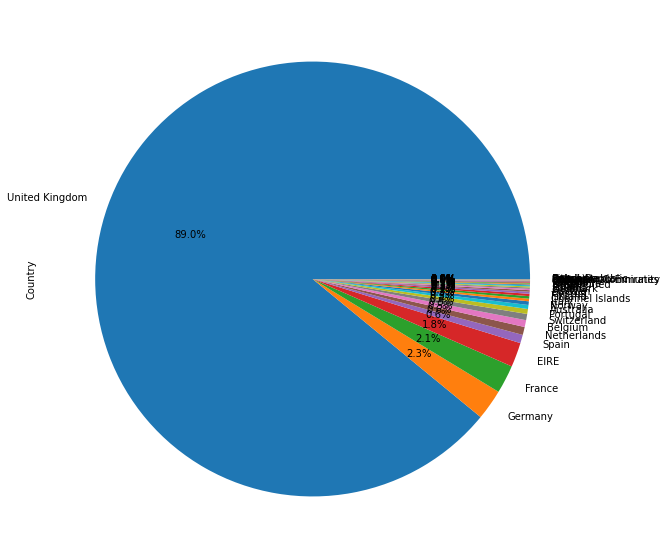

In [7]:
plt.figure(figsize = (10, 10))
df['Country'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

In [8]:
# Analysing the market of UK
basket = df[df['Country'] == 'United Kingdom'].groupby(['InvoiceNo', 'Description'])
basket.first()

StockCode  Quantity  \
InvoiceNo Description                                               
536365    CREAM CUPID HEARTS COAT HANGER         84406B         8   
          GLASS STAR FROSTED T-LIGHT HOLDER       21730         6   
          KNITTED UNION FLAG HOT WATER BOTTLE    84029G         6   
          RED WOOLLY HOTTIE WHITE HEART.         84029E         6   
          SET 7 BABUSHKA NESTING BOXES            22752         2   
...                                                 ...       ...   
581585    ZINC WILLIE WINKIE  CANDLE STICK        84832        24   
581586    DOORMAT RED RETROSPOT                   20685        10   
          LARGE CAKE STAND  HANGING STRAWBERY     22061         8   
          RED RETROSPOT ROUND CAKE TINS           21217        24   
          SET OF 3 HANGING OWLS OLLIE BEAK        23275        24   

                                                   InvoiceDate  UnitPrice  \
InvoiceNo Description                                                       
536365    CREAM CUPID HEARTS COAT HANGER        12/1/2010 8:26       2.75   
          GLASS STAR FROSTED T-LIGHT HOLDER     12/1/2010 8:26       4.25   
          KNITTED UNION FLAG HOT WATER BOTTLE   12/1/2010 8:26       3.39   
          RED WOOLLY HOTTIE WHITE HEART.        12/1/2010 8:26       3.39   
          SET 7 BABUSHKA NESTING BOXES          12/1/2010 8:26       7.65   
...                                                        ...        ...   
581585    ZINC WILLIE WINKIE  CANDLE STICK     12/9/2011 12:31       0.85   
581586    DOORMAT RED RETROSPOT                12/9/2011 12:49       7.08   
          LARGE CAKE STAND  HANGING STRAWBERY  12/9/2011 12:49       2.95   
          RED RETROSPOT ROUND CAKE TINS        12/9/2011 12:49       8.95   
          SET OF 3 HANGING OWLS OLLIE BEAK     12/9/2011 12:49       1.25   

                                               CustomerID         Country  
InvoiceNo Description                                                      
536365    CREAM CUPID HEARTS COAT HANGER          17850.0  United Kingdom  
          GLASS STAR FROSTED T-LIGHT HOLDER       17850.0  United Kingdom  
          KNITTED UNION FLAG HOT WATER BOTTLE     17850.0  United Kingdom  
          RED WOOLLY HOTTIE WHITE HEART.          17850.0  United Kingdom  
          SET 7 BABUSHKA NESTING BOXES            17850.0  United Kingdom  
...                                                   ...             ...  
581585    ZINC WILLIE WINKIE  CANDLE STICK        15804.0  United Kingdom  
581586    DOORMAT RED RETROSPOT                   13113.0  United Kingdom  
          LARGE CAKE STAND  HANGING STRAWBERY     13113.0  United Kingdom  
          RED RETROSPOT ROUND CAKE TINS           13113.0  United Kingdom  
          SET OF 3 HANGING OWLS OLLIE BEAK        13113.0  United Kingdom  

[344362 rows x 6 columns]

In [9]:
basket = basket['Quantity'].sum().unstack().fillna(0)
basket.shape

(16649, 3844)

In [10]:
# encoding the data in binary form 
def encode(x):
    if x<=0: 
        return 0
    if x >= 1:
        return 1
basket = basket.applymap(encode)
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# filter the transactions 
# we will considers those invoices in which the purchase of more than 1 item take place
basket = basket[basket.sum(axis=1) >= 2]
basket.shape

(15376, 3844)

### Applying Apriori Algorithm

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
# considering the frequent item is that item which transcat more than 3 percent 
freqItemset = apriori(basket, min_support = 0.03, use_colnames = True).sort_values('support', ascending = False).reset_index(drop = True)
freqItemset

C:\Users\Antriksh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.093197,(JUMBO BAG RED RETROSPOT)
2,0.090466,(REGENCY CAKESTAND 3 TIER)
3,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.082986,(PARTY BUNTING)
...,...,...
103,0.030697,(DOORMAT UNION FLAG)
104,0.030632,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."
105,0.030502,(SET OF 3 HEART COOKIE CUTTERS)
106,0.030372,(DOLLY GIRL LUNCH BOX)


In [33]:
association_rules(freqItemset, metric = 'lift', min_threshold = 1).sort_values('lift', ascending = False).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164


### Conclusions

Higher the lift, higher the association

1) Green Regency Teacup and Saucer -> Roses Regency Teacup and Saucer

2) Lunch Bag Red Retrospot -> Lunch Bag Pink Polkadot
